# Analise do dataset

## Carregamento do dataset

In [75]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, metrics

import numpy as np

import os
import pathlib
import matplotlib.pyplot as plt

NCLASSES = 2
HEIGHT = 50
WIDTH = 50
NUM_CHANNELS = 3
BATCH_SIZE = 32

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == classNames

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_png(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [WIDTH, HEIGHT])

def get_bytes_and_label(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

data_dir = pathlib.Path('cell_images/')

print(data_dir)

classNames = np.array(os.listdir(data_dir))

print ("Classes: "+str(classNames))

AUTOTUNE = tf.data.experimental.AUTOTUNE

listset = tf.data.Dataset.list_files("cell_images/*/*.png")
dataset = listset.map(get_bytes_and_label, num_parallel_calls = AUTOTUNE)

cell_images
Classes: ['Parasitized' 'Uninfected']


## Número de imagens totais e de infetados e não infetados

In [76]:
for image, label in dataset.take(1):
  print("Image shape: ", image.numpy().shape)
  
dataset_length = [i for i,_ in enumerate(dataset)][-1] + 1
print("Total images in dataset: ",dataset_length)

import os.path
pathInfected = 'cell_images/Parasitized'
pathUninfected = 'cell_images/Uninfected'

num_files = len([f for f in os.listdir(pathInfected)if os.path.isfile(os.path.join(pathInfected, f))])

print("Infected Images: "+str(num_files))

num_files = len([f for f in os.listdir(pathUninfected)if os.path.isfile(os.path.join(pathUninfected, f))])

print("Uninfected Images: "+str(num_files))

Image shape:  (50, 50, 3)
Total images in dataset:  27558
Infected Images: 13780
Uninfected Images: 13780


## Exemplo de algumas imagens infetadas e não infetadas

Exemplo de imagens


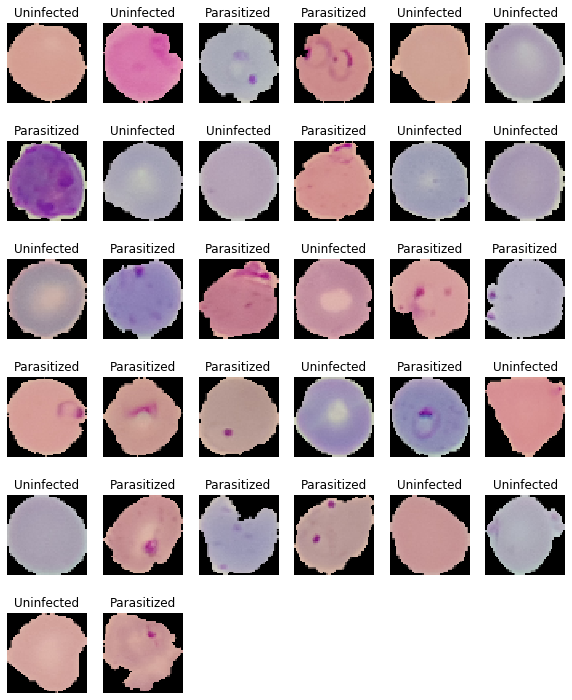

In [77]:
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size = dataset_length)
dataset = dataset.batch(batch_size=35)
dataset = dataset.prefetch(buffer_size=AUTOTUNE)
dataset = dataset.repeat()

def show_batch(image_batch, label_batch):
  columns = 6
  rows = BATCH_SIZE / columns + 1  
  plt.figure(figsize=(10, 2 * rows))
  for n in range(BATCH_SIZE):
      ax = plt.subplot(rows, columns, n+1)
      plt.imshow((image_batch[n]))
      plt.title(classNames[label_batch[n]==1][0])
      plt.axis('off')
        
print("Exemplo de imagens")
image_batch, label_batch = next(iter(dataset))  
show_batch(image_batch, label_batch.numpy())

In [78]:
from PIL import Image
heights=[]
widths=[]
for image in listset:
    img=Image.open(image.numpy())
    heights.append(img.height)
    widths.append(img.width)

## Distribuição dos tamanhos de todas as imagens

Mínimo de altura:  40 , e máximo de altura:  385
Mínimo de largura:  46 , e máximo de largura:  394


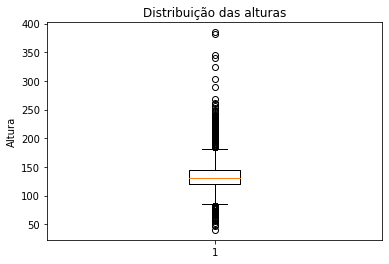

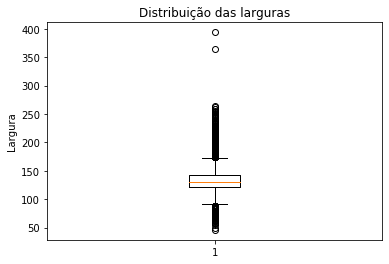

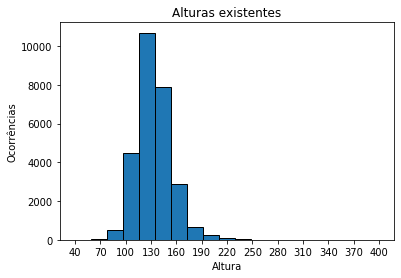

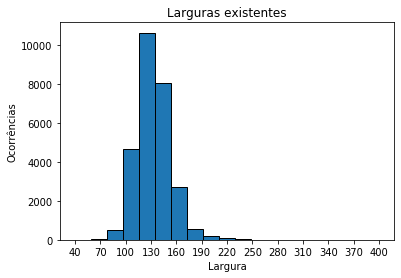

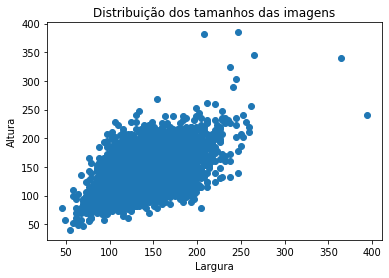

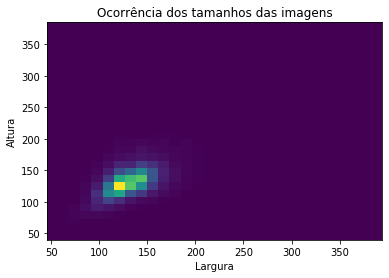

In [90]:
bins = np.linspace(40, 400, 20)        

print('Mínimo de altura: ', min(heights), ', e máximo de altura: ', max(heights))
print('Mínimo de largura: ', min(widths), ', e máximo de largura: ', max(widths))

#plt.subplot(2,2,1)
plt.boxplot(heights)
plt.title('Distribuição das alturas')
plt.ylabel('Altura')
plt.show()

#plt.subplot(2,2,2)
plt.boxplot(widths)
plt.title('Distribuição das larguras')
plt.ylabel('Largura')
plt.show()

#plt.subplot(2,2,3)
plt.hist(heights,bins, histtype="bar", ec='black')
plt.title('Alturas existentes')
plt.ylabel('Ocorrências')
plt.xlabel('Altura')
plt.xticks(range(40,401,30))
plt.show()

#plt.subplot(2,2,4)
plt.hist(widths,bins, histtype="bar", ec='black')
plt.title('Larguras existentes')
plt.ylabel('Ocorrências')
plt.xlabel('Largura')
plt.xticks(range(40,401,30))
#plt.tight_layout()
plt.show()

plt.scatter(widths,heights)
plt.title('Distribuição dos tamanhos das imagens')
plt.ylabel('Altura')
plt.xlabel('Largura')
plt.show()

plt.hist2d(widths,heights,bins=(30,30))
plt.title('Ocorrência dos tamanhos das imagens')
plt.ylabel('Altura')
plt.xlabel('Largura')
plt.show()

## Visualização de alguns reshapes de imagens com tamanhos muito grandes e muito pequenos

Imagem Original:


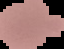

Imagem aumentada:


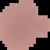

Imagem Original:


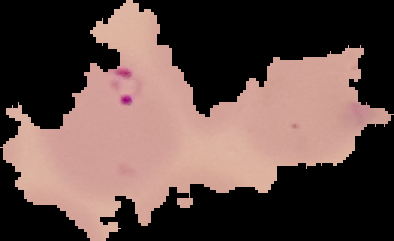

Imagem reduzida:


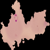

Imagem Original:


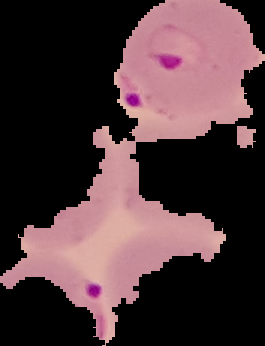

Imagem reduzida:


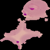

Imagem Original:


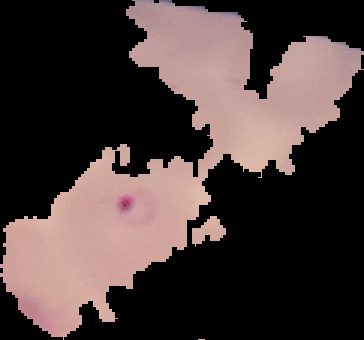

Imagem reduzida:


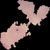

Imagem Original:


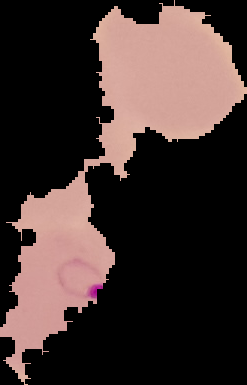

Imagem reduzida:


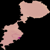

Imagem Original:


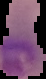

Imagem aumentada:


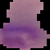

Imagem Original:


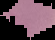

Imagem aumentada:


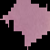

Imagem Original:


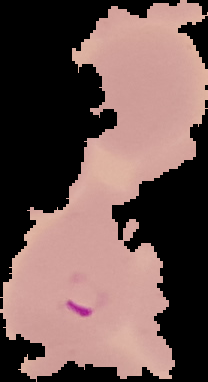

Imagem reduzida:


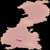

Imagem Original:


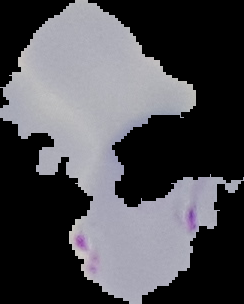

Imagem reduzida:


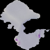

Imagem Original:


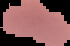

Imagem aumentada:


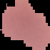

Imagem Original:


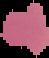

Imagem aumentada:


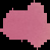

Imagem Original:


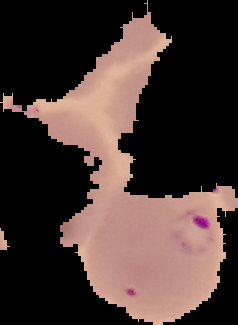

Imagem reduzida:


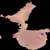

In [91]:
from IPython.display import display
for image in listset:
    img=Image.open(image.numpy())
    if img.height>300 or img.width>300:
        print('Imagem Original:')
        display(img)
        img=img.resize((50,50))
        print('Imagem reduzida:')
        display(img)
    if img.height<50 or img.width<50:
        print('Imagem Original:')
        display(img)
        img=img.resize((50,50))
        print('Imagem aumentada:')
        display(img)

## Remoção de alguns pontos extremos ("outliers") utilizando o valor de z da curva normal

In [92]:
import pandas as pd
from scipy import stats
df=pd.DataFrame(columns=['Heights', 'Widths'])
df['Heights']=heights
df['Widths']=widths
df
z = np.abs(stats.zscore(df))
threshold = 2
print(np.where(z > threshold))
# The first array contains the list of row numbers and second array respective column numbers

(array([    4,    20,    73, ..., 27540, 27554, 27554], dtype=int64), array([1, 1, 1, ..., 1, 0, 1], dtype=int64))


In [93]:
# Só fazer 1 vez
df = df[(np.abs(stats.zscore(df)) < 4).all(axis=1)]
df.index = np.arange(1, len(df) + 1)
df

,Heights,Widths
1,139,145
2,127,133
3,160,160
4,103,109
5,154,184
...,...,...
27411,142,133
27412,184,190
27413,121,145
27414,145,130


## Novo estudo do dataset com os pontos extremos retirados

Mínimo de altura:  52 , e máximo de altura:  214
Mínimo de largura:  58 , e máximo de largura:  211


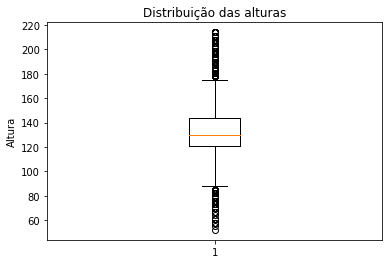

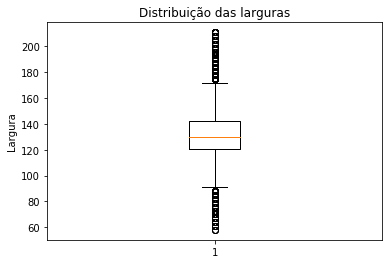

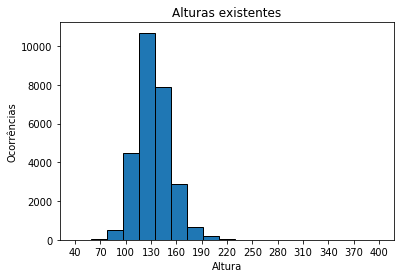

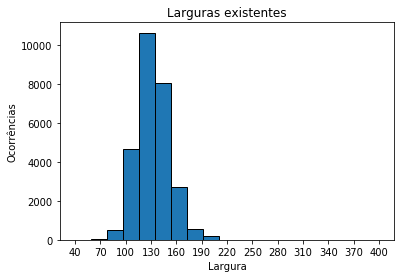

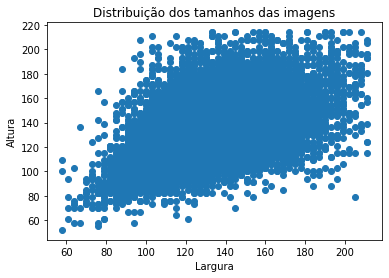

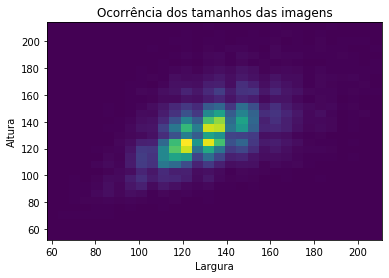

In [94]:
bins = np.linspace(40, 400, 20)        

print('Mínimo de altura: ', df['Heights'].min(), ', e máximo de altura: ', df['Heights'].max())
print('Mínimo de largura: ', df['Widths'].min(), ', e máximo de largura: ', df['Widths'].max())

#plt.subplot(2,2,1)
plt.boxplot(df['Heights'])
plt.title('Distribuição das alturas')
plt.ylabel('Altura')
plt.show()

#plt.subplot(2,2,2)
plt.boxplot(df['Widths'])
plt.title('Distribuição das larguras')
plt.ylabel('Largura')
plt.show()

#plt.subplot(2,2,3)
plt.hist(df['Heights'],bins, histtype="bar", ec='black')
plt.title('Alturas existentes')
plt.ylabel('Ocorrências')
plt.xlabel('Altura')
plt.xticks(range(40,401,30))
plt.show()

#plt.subplot(2,2,4)
plt.hist(df['Widths'],bins, histtype="bar", ec='black')
plt.title('Larguras existentes')
plt.ylabel('Ocorrências')
plt.xlabel('Largura')
plt.xticks(range(40,401,30))
#plt.tight_layout()
plt.show()

plt.scatter(df['Widths'],df['Heights'])
plt.title('Distribuição dos tamanhos das imagens')
plt.ylabel('Altura')
plt.xlabel('Largura')
plt.show()

plt.hist2d(df['Widths'],df['Heights'],bins=(30,30))
plt.title('Ocorrência dos tamanhos das imagens')
plt.ylabel('Altura')
plt.xlabel('Largura')
plt.show()